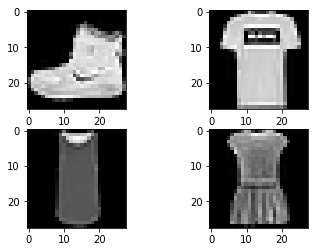

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import fashion_mnist
#from keras.datasets import cifar10
import matplotlib.pyplot as plt
# load (downloaded if needed) the FASHION_MNIST dataset
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
type(X_train)

numpy.ndarray

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import regularizers
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print("Number of images: ", str(X_train.shape[0]))
print("Number of pixels in each image: ", str(num_pixels))


Number of images:  60000
Number of pixels in each image:  784


In [4]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
X_train[0,180:200]

array([  0.,   0., 155., 236., 207., 178., 107., 156., 161., 109.,  64.,
        23.,  77., 130.,  72.,  15.,   0.,   0.,   0.,   0.],
      dtype=float32)

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train[0,180:200]

array([0.        , 0.        , 0.60784316, 0.9254902 , 0.8117647 ,
       0.69803923, 0.41960785, 0.6117647 , 0.6313726 , 0.42745098,
       0.2509804 , 0.09019608, 0.3019608 , 0.50980395, 0.28235295,
       0.05882353, 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(100, kernel_initializer='normal', activation='relu',input_shape=(num_pixels,)))
#network.add(layes.Dropout(0.5))
 model.add(Dense(60, kernel_initializer='normal', activation='softmax'))
 model.add(Dense(32, kernel_initializer='normal', activation='softmax'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [12]:
# build the model
from keras import backend as K
K.clear_session()
model = baseline_model()

In [13]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
# Fit the model
max_epochs = 40
batch_size=150
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_epochs, batch_size=batch_size, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 2s - loss: 2.2598 - acc: 0.3033 - val_loss: 2.1381 - val_acc: 0.3891
Epoch 2/40
 - 2s - loss: 1.8922 - acc: 0.4191 - val_loss: 1.6594 - val_acc: 0.3842
Epoch 3/40
 - 2s - loss: 1.5171 - acc: 0.3863 - val_loss: 1.4157 - val_acc: 0.3894
Epoch 4/40
 - 2s - loss: 1.3420 - acc: 0.3892 - val_loss: 1.2953 - val_acc: 0.3866
Epoch 5/40
 - 2s - loss: 1.2573 - acc: 0.3904 - val_loss: 1.2375 - val_acc: 0.3966
Epoch 6/40
 - 2s - loss: 1.2112 - acc: 0.3986 - val_loss: 1.2045 - val_acc: 0.3976
Epoch 7/40
 - 2s - loss: 1.1791 - acc: 0.4110 - val_loss: 1.1758 - val_acc: 0.4173
Epoch 8/40
 - 2s - loss: 1.1424 - acc: 0.4471 - val_loss: 1.1369 - val_acc: 0.4742
Epoch 9/40
 - 2s - loss: 1.1072 - acc: 0.4926 - val_loss: 1.1059 - val_acc: 0.5267
Epoch 10/40
 - 2s - loss: 1.0619 - acc: 0.5552 - val_loss: 1.0490 - val_acc: 0.5738
Epoch 11/40
 - 2s - loss: 0.9943 - acc: 0.5838 - val_loss: 0.9895 - val_acc: 0.5810
Epoch 12/40
 - 2s - loss: 0.9371 - 

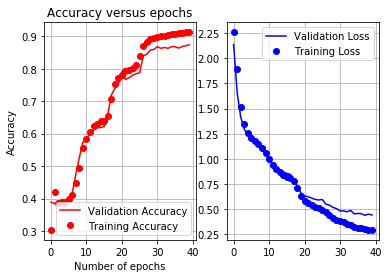

In [15]:
x = np.arange(0, max_epochs, 1)
val_acc = history.history['val_acc']
train_acc = history.history['acc']
plt.figure(1)
plt.subplot(121)
plt.plot(x,val_acc,'r')
plt.plot(x,train_acc,'ro')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy versus epochs')
plt.legend(['Validation Accuracy','Training Accuracy'])
plt.grid(True)

plt.subplot(122)
val_loss = history.history['val_loss']
train_loss = history.history['loss']
plt.plot(x, val_loss, 'b') # plotting t, a separately 
plt.plot(x, train_loss, 'bo') 
plt.grid(True)
plt.legend(['Validation Loss','Training Loss'])

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt


x = tf.Variable(3, name="x") 
y = tf.Variable(4, name="y") 
f=x*x*y+y+2


sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

In [ ]:
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
 theta_value = theta.eval()